In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 

%matplotlib inline

In [35]:
#读取shp文件
regions = gpd.GeoDataFrame.from_file('./file/shp/jiangsu_city.shp',encoding='gbk')

In [34]:
regions.head(3)

,NAME,KIND,geometry
0,南京市,0137,"POLYGON ((119.13554 31.44678, 119.13580 31.446..."
1,南通市,0137,"POLYGON ((120.86479 32.61372, 120.86563 32.613..."
2,宿迁市,0137,"POLYGON ((118.86925 33.89350, 118.86859 33.893..."


In [4]:
#处理表格数据，找到匹配项
data = pd.read_csv('./file/jiangsu/jiangsu_data.csv')
data['city_name'] = data['city_name'].str.replace(' ','')
data['city_name'] = data['city_name'].apply(lambda x:x + '市')

In [5]:
#连接两个表，注意shp地图数据放在前面，否则无法画图
reg = pd.merge(regions,data,right_on='city_name',left_on='NAME')

In [6]:
# 新增一个PGDP列，再把数据拷贝一份
reg['PGDP2015'] = reg['GDP2015'] / reg['POP2015'] 
reg02 = reg.drop(['city_name','Unnamed: 0'],axis=1).copy()

In [23]:
#查官方文档，用lambda函数将每个区域中心点坐标提取到coords列
reg02['coords'] = reg02['geometry'].apply(lambda x:x.representative_point().coords[0])

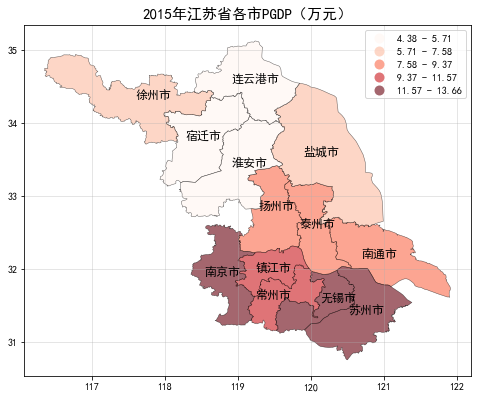

In [33]:
reg02.plot(figsize=(8,8),edgecolor='k',linewidth=0.5,legend=True,
           column='PGDP2015',#用PGDP列做值
           scheme='quantiles',#查官方文档，这个参数用对列分等级
          cmap='Reds',#colormap，通用配色参数，查文档
          alpha=0.6)
for i in range(len(reg02)):#加文字，用区域中心点坐标
    plt.text(reg02['coords'][i][0]-0.2,reg02['coords'][i][1],reg02['NAME'][i],fontsize=12)
plt.title('2015年江苏省各市PGDP（万元）',fontsize=15)
plt.grid(alpha=0.4)